In [ ]:
import pandas as pd #no presentation needed
import statsmodels # for test in statistics
import matplotlib.pyplot as plt # for plots
from sktime.utils.plotting import plot_series # for plots
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # for plots
from sktime.forecasting.model_selection import temporal_train_test_split
from statsmodels.tsa.statespace.sarimax import SARIMAX 
from statsmodels.tsa.arima_model import ARMA
from sktime.forecasting.arima import ARIMA, AutoARIMA
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
from sktime.datasets import load_shampoo_sales
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_squared_error

At this point, we import the sunspots per month dataset

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-sunspots.csv', sep=',', encoding='utf-8-sig')
df

,Month,Sunspots
0,1749-01,58.0
1,1749-02,62.6
2,1749-03,70.0
3,1749-04,55.7
4,1749-05,85.0
...,...,...
2815,1983-08,71.8
2816,1983-09,50.3
2817,1983-10,55.8
2818,1983-11,33.3


Dataframe is not ok since we need series

In [ ]:
df["Month"] = pd.to_datetime(df["Month"])

In [ ]:
sun_series = pd.Series(df['Sunspots'].values , index=df['Month']).fillna(0) 
sun_series

Month
1749-01-01    58.0
1749-02-01    62.6
1749-03-01    70.0
1749-04-01    55.7
1749-05-01    85.0
              ... 
1983-08-01    71.8
1983-09-01    50.3
1983-10-01    55.8
1983-11-01    33.3
1983-12-01    33.4
Length: 2820, dtype: float64

In [ ]:
sun_series 

Month
1749-01-01    58.0
1749-02-01    62.6
1749-03-01    70.0
1749-04-01    55.7
1749-05-01    85.0
              ... 
1983-08-01    71.8
1983-09-01    50.3
1983-10-01    55.8
1983-11-01    33.3
1983-12-01    33.4
Length: 2820, dtype: float64

Dataset for all years is very big. Lets see how it looks for two years:

In [ ]:
dfkl = df[(df['Month'].dt.year == 1749) | (df['Month'].dt.year == 1750)]

(<Figure size 1152x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fda269d5950>)

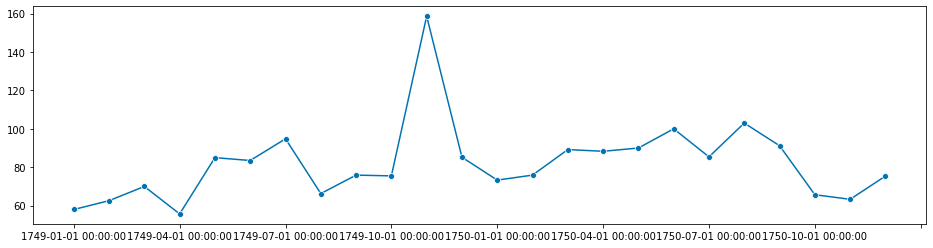

In [ ]:
sun_series2 = pd.Series(dfkl['Sunspots'].values , index=dfkl['Month']).fillna(0)
plot_series(sun_series2)

Now lets see it for full time:

(<Figure size 1152x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fda2b7e0dd0>)

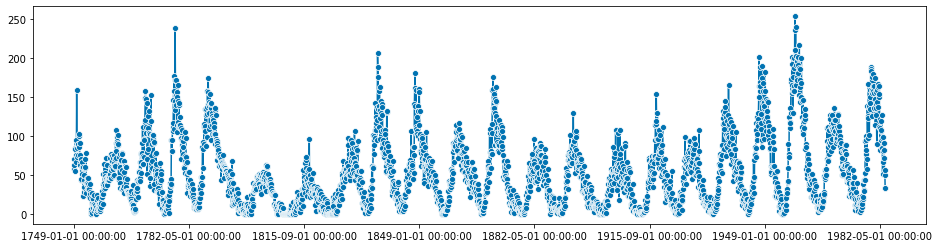

In [ ]:
# now we can plot our series for better understanding 
plot_series(sun_series)

-Uoh... Is it hot inhere?

-But we outside...

-Oh, Okay. Is it hot outhere?

In [ ]:
# Английский юмор. Обожаю.

Now we like a butchers devide our data into test and train part for further training on forecasting models with the help of temporal_train_test_split

(<Figure size 1152x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fda26615910>)

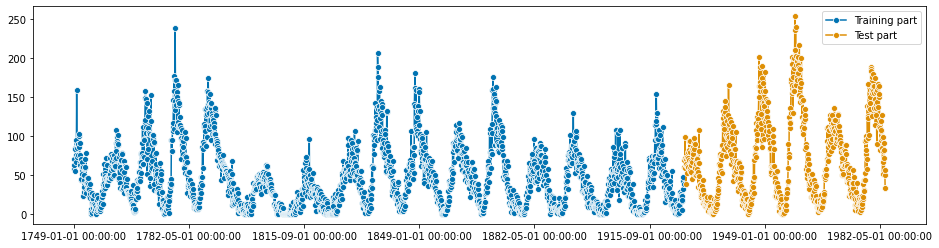

In [ ]:
y_train, y_test = temporal_train_test_split(sun_series, test_size=700) # WE use 25% data as test
plot_series(y_train, y_test, labels=['Training part', 'Test part']) 


Now we need to check for stationarity

Why we need this? If it is stationary we can use ARIMA models to predict the next results of the time series. If it is non-stationary then you need to use common ARMA (1,1)

We definitely need to know if our data set is stationary, so this should be checked. Since we used the Dickey Fuller test during the study of the materials, it is it thich will be given here. So that we understand the process and the result.

In [ ]:
result = adfuller(df['Sunspots'])

(<Figure size 1152x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fda26a61a10>)

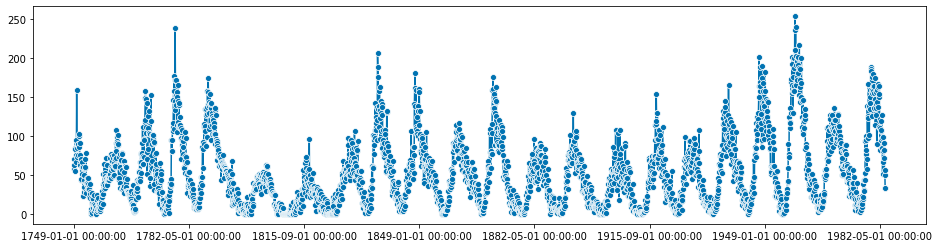

In [ ]:
plot_series(sun_series)

We will understand that the data is not stationary if the trend is clearly visible on it.

In [ ]:
print('ADF Statistic:', result[0]) #test
print('p-value:', result[1])

ADF Statistic: -9.567667511913072
p-value: 2.3334521438663556e-16


The zeroth element = -9.5
The more negative this number => higher chance that data is stationary => ok

P value = 2.33 
and it is bigger than 0.05 => we accept null hypo => 
=> our data is stationary


Now we test data for seasonality

Best way to find the correct model order is ACF and PACF 

By comparing the ACF and PACF for the time series, we can determine the order of the model.

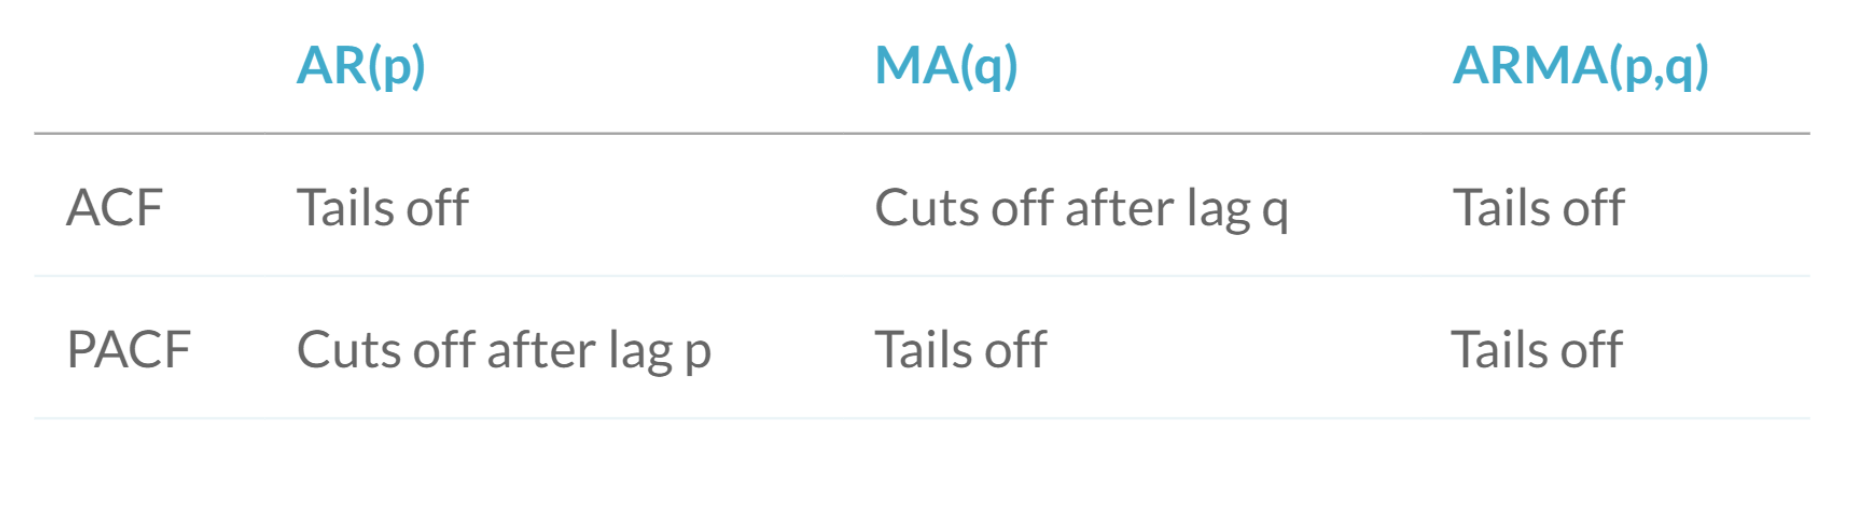

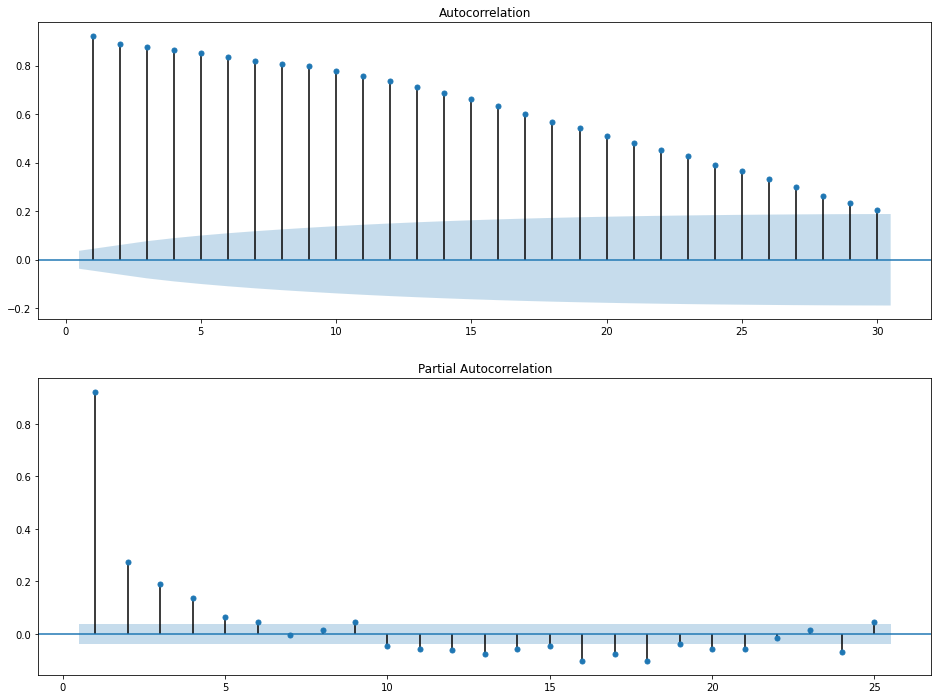

In [ ]:
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(16,12)) 
 
# Plot the ACF 
plot_acf(df['Sunspots'], lags=30, zero=False, ax=ax1)

# Plot the PACF 
plot_pacf(df['Sunspots'], lags=25, zero=False, ax=ax2)

plt.show()

Here, we can see that autocorrelation tails off as well as partial correlation. Thus, we deal with ARMA model.

But we can 

In [ ]:
forecaster = AutoARIMA(suppress_warnings=True)
forecaster.fit(y_train)
forecaster.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2120
Model:               SARIMAX(2, 1, 2)   Log Likelihood               -8732.678
Date:                Wed, 03 Mar 2021   AIC                          17475.355
Time:                        20:40:42   BIC                          17503.649
Sample:                             0   HQIC                         17485.714
                               - 2120                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.2880      0.025     50.996      0.000       1.238       1.337
ar.L2         -0.3529      0.025    -14.176      0.000      -0.402      -0.304
ma.L1         -1.7399      0.018    -98.401      0.000      -1.775      -1.705
ma.L2          0.7836      0.017     47.313      0.000       0.751       0.816
sigma2       222.3164      4.057     54.792      0.000     214.364     230.269
===================================================================================
Ljung-Box (L1) (Q):                   0.20   Jarque-Bera (JB):              1267.77
Prob(Q):                              0.66   Prob(JB):                         0.00
Heteroskedasticity (H):               0.82   Skew:                             0.33
Prob(H) (two-sided):                  0.01   Kurtosis:                         6.73
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
model = SARIMAX(y_train, order=(2, 1, 2),
                enforce_invertibility=False,
                enforce_stationarity=False,
                simple_differencing=False, 
                measurement_error=False,
                k_trend=0)
results = model.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [ ]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2120
Model:               SARIMAX(2, 1, 2)   Log Likelihood               -8721.521
Date:                Wed, 03 Mar 2021   AIC                          17453.043
Time:                        20:41:05   BIC                          17481.329
Sample:                    01-01-1749   HQIC                         17463.399
                         - 08-01-1925                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.2872      0.025     51.908      0.000       1.239       1.336
ar.L2         -0.3555      0.025    -14.444      0.000      -0.404      -0.307
ma.L1         -1.7400      0.017    -99.653      0.000      -1.774      -1.706
ma.L2          0.7851      0.016     47.980      0.000       0.753       0.817
sigma2       222.2811      4.091     54.331      0.000     214.262     230.300
===================================================================================
Ljung-Box (L1) (Q):                   0.18   Jarque-Bera (JB):              1204.98
Prob(Q):                              0.67   Prob(JB):                         0.00
Heteroskedasticity (H):               0.82   Skew:                             0.31
Prob(H) (two-sided):                  0.01   Kurtosis:                         6.64
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
one_step_forecast = results.get_prediction(start=-700)

# Prediction mean
mean_forecast = one_step_forecast.predicted_mean

# Getting confidence intervals of predictions
confidence_intervals = one_step_forecast.conf_int()

# Getting lower and upper confidence limits
lower_limits = confidence_intervals.loc[:,'lower y']
upper_limits = confidence_intervals.loc[:,'upper y']

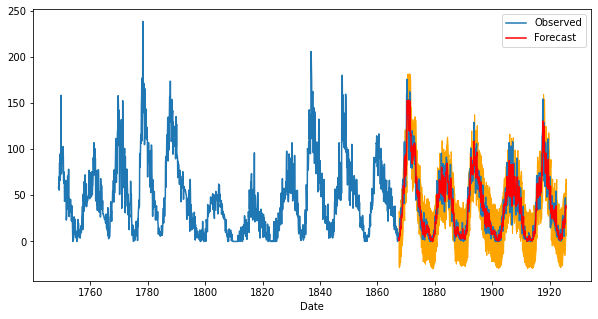

In [ ]:
plt.figure(figsize = (10, 5))

plt.plot(y_train.index, y_train, label='Observed');

plt.plot(mean_forecast.index, mean_forecast, color='r', label='Forecast');

plt.fill_between(lower_limits.index, lower_limits, upper_limits, color='orange');

plt.xlabel('Date');
plt.legend();